<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Bagging, Random Forests and Boosted Trees

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor


def create_lagged_series(symbol, start_date, end_date, lags=3):
    """
    This creates a pandas DataFrame that stores 
    the percentage returns of the adjusted closing 
    value of a stock obtained from Yahoo Finance, 
    along with a number of lagged returns from the 
    prior trading days (lags defaults to 3 days).
    Trading volume is also included.
    """

    # Obtain stock information from Yahoo Finance
    ts = web.DataReader(
        symbol, "yahoo", start_date, end_date
    )

    # Create the new lagged DataFrame
    tslag = pd.DataFrame(index=ts.index)
    tslag["Today"] = ts["Adj Close"]
    tslag["Volume"] = ts["Volume"]

    # Create the shifted lag series of
    # prior trading period close values
    for i in range(0, lags):
        tslag["Lag%s" % str(i+1)] = ts["Adj Close"].shift(i+1)

    # Create the returns DataFrame
    tsret = pd.DataFrame(index=tslag.index)
    tsret["Volume"] = tslag["Volume"]
    tsret["Today"] = tslag["Today"].pct_change()*100.0

    # Create the lagged percentage returns columns
    for i in range(0, lags):
        tsret["Lag%s" % str(i+1)] = tslag[
            "Lag%s" % str(i+1)
        ].pct_change()*100.0
    tsret = tsret[tsret.index >= start_date]
    return tsret


Bagging Estimator: 10 of 1000...
Bagging Estimator: 20 of 1000...
Bagging Estimator: 30 of 1000...
Bagging Estimator: 40 of 1000...
Bagging Estimator: 50 of 1000...
Bagging Estimator: 60 of 1000...
Bagging Estimator: 70 of 1000...
Bagging Estimator: 80 of 1000...
Bagging Estimator: 90 of 1000...
Bagging Estimator: 100 of 1000...
Bagging Estimator: 110 of 1000...
Bagging Estimator: 120 of 1000...
Bagging Estimator: 130 of 1000...
Bagging Estimator: 140 of 1000...
Bagging Estimator: 150 of 1000...
Bagging Estimator: 160 of 1000...
Bagging Estimator: 170 of 1000...
Bagging Estimator: 180 of 1000...
Bagging Estimator: 190 of 1000...
Bagging Estimator: 200 of 1000...
Bagging Estimator: 210 of 1000...
Bagging Estimator: 220 of 1000...
Bagging Estimator: 230 of 1000...
Bagging Estimator: 240 of 1000...
Bagging Estimator: 250 of 1000...
Bagging Estimator: 260 of 1000...
Bagging Estimator: 270 of 1000...
Bagging Estimator: 280 of 1000...
Bagging Estimator: 290 of 1000...
Bagging Estimator: 300 

Boosting Estimator: 250 of 1000...
Boosting Estimator: 260 of 1000...
Boosting Estimator: 270 of 1000...
Boosting Estimator: 280 of 1000...
Boosting Estimator: 290 of 1000...
Boosting Estimator: 300 of 1000...
Boosting Estimator: 310 of 1000...
Boosting Estimator: 320 of 1000...
Boosting Estimator: 330 of 1000...
Boosting Estimator: 340 of 1000...
Boosting Estimator: 350 of 1000...
Boosting Estimator: 360 of 1000...
Boosting Estimator: 370 of 1000...
Boosting Estimator: 380 of 1000...
Boosting Estimator: 390 of 1000...
Boosting Estimator: 400 of 1000...
Boosting Estimator: 410 of 1000...
Boosting Estimator: 420 of 1000...
Boosting Estimator: 430 of 1000...
Boosting Estimator: 440 of 1000...
Boosting Estimator: 450 of 1000...
Boosting Estimator: 460 of 1000...
Boosting Estimator: 470 of 1000...
Boosting Estimator: 480 of 1000...
Boosting Estimator: 490 of 1000...
Boosting Estimator: 500 of 1000...
Boosting Estimator: 510 of 1000...
Boosting Estimator: 520 of 1000...
Boosting Estimator: 

/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_28212/2581708555.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_28212/2581708555.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_28212/2581708555.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')


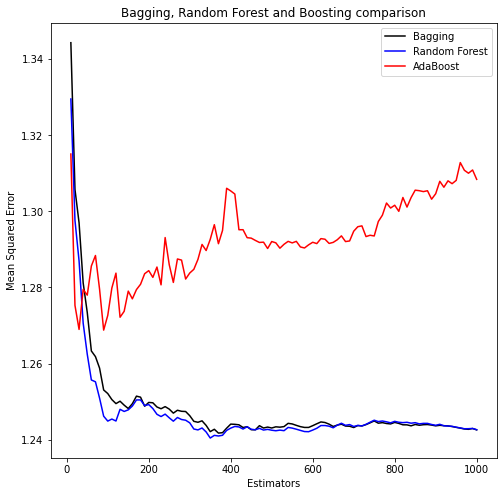

In [2]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 42
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

# Download ten years worth of Amazon
# adjusted closing prices
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2015, 12, 31)
amzn = create_lagged_series("AMZN", start, end, lags=3)
amzn.dropna(inplace=True)

# Use the first three daily lags of AMZN closing prices
# and scale the data to lie within -1 and +1 for comparison
X = amzn[["Lag1", "Lag2", "Lag3"]]
y = amzn["Today"]
X = scale(X)
y = scale(y)

# Use the training-testing split with 70% of data in the
# training data with the remaining 30% of data in the testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state
)

# Pre-create the arrays which will contain the MSE for
# each particular ensemble method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

# Estimate the Random Forest MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

# Estimate the AdaBoost MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    boosting = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
    boosting.fit(X_train, y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

# Plot the chart of MSE versus number of estimators
plt.figure(figsize=(8, 8))
plt.title('Bagging, Random Forest and Boosting comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://www.quantstart.com/articles/bootstrap-aggregation-random-forests-and-boosted-trees/

</font>
</div>